# K-Means Clustering (kclust)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(0)

kclust is a clustering algorithm that finds the optimal kmeans clustering model by iterating over a range of values and creating a model with the lowest possible silhouette score.

Kmeans clustering is a form of clustering that works to seperate samples into a number of equivariant groups while minimizing the sum of the smallest squared deviations that each sample point has from any of the cluster means. Mathematically, the algorithm is trying to create clusters with small enough means to minimize the following quantity:

$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \sum_{i=1}^{N}$ min$_{\mu_{c}^{c \in C}}||x_{i} - \mu_{c}||^{2}$

where $N$ is the number of samples, $\mu_{c}$ is the mean of cluster $c$, $C$ is the set of all clusters, $x_{i}$ is a sample point, and $|| \ \ \ \ \ ||$ is the Euclidean distance.



Let's look at an example using the synthetic data from this [paper](https://arxiv.org/abs/1909.02688)

In [12]:
from graspy.cluster.kclust import KMeansCluster

# Synthetic data
ks = [i for i in range(1,21)]

x_synthetic = np.genfromtxt('../../../../autogmm/data/synthetic.csv', delimiter=',',skip_header=0)
x_synthetic = x_synthetic[:,np.arange(1,x_synthetic.shape[1])]
c_true_synthetic = np.genfromtxt('../../../../autogmm/data/synthetic.csv', delimiter=',', usecols = (0),skip_header=0)

# Fit model
model_synthetic = KMeansCluster(max_clusters=ks[len(ks)-1])

c_hat_kmeans_synthetic = model_synthetic.fit_predict(x_synthetic,c_true_synthetic)

In [11]:
# We can review each model tested and observe the best one generated
model = model_synthetic.model_
k = model_synthetic.n_clusters_
silhouettes = model_synthetic.silhouette_
ari = model_synthetic.ari_

print('Best model: ' + str(model))
print('\nBest k: ' + str(k))
print('\nSilhouettes: ' + str(silhouettes))
print('\nARIs: ' + str(ari))

Best model: KMeans(n_clusters=3)

Best k: 2

Silhouettes: [0.44805161300120183, 0.55350005042055, 0.40670275419776813, 0.32879464587067814, 0.32476248948706365, 0.2825694916882702, 0.293808721985473, 0.3643671641186787, 0.32558620230792856, 0.31056371298654556, 0.32404832058095, 0.2940674811262057, 0.2967755997498423, 0.30573852419248937, 0.3132356101586974, 0.3041995517226048, 0.2952086495876473, 0.2868122686812598, 0.2773425682874612]

ARIs: [0.545310118798948, 1.0, 0.7614886835770394, 0.6581151633281938, 0.5769624732284198, 0.502868044319426, 0.41361936452589804, 0.5059457308352417, 0.3992566341083931, 0.3471670963915163, 0.37119766742234833, 0.30640388708956107, 0.29376061163696254, 0.27185294418125133, 0.2634440908484517, 0.23157151530762438, 0.23085708291899942, 0.21201104702389328, 0.20549871491452426]


KMeans(n_clusters=3)

Now let's look at the Drosophila mushroom dataset

In [16]:
from graspy.cluster.autogmm import AutoGMMCluster

# Drosophila Data
ks = [i for i in range(1,21)]

x_drosophila = np.genfromtxt('../../../../autogmm/data/embedded_right.csv',delimiter=',',skip_header=1)
c_true_drosophila = np.genfromtxt('../../../../autogmm/data/classes.csv',skip_header=1)

# Fit model
model_drosophila = KMeansCluster(max_clusters=ks[len(ks)-1])

c_hat_kmeans_drosophila = model_drosophila.fit_predict(x_drosophila,c_true_drosophila)

We can compare our method to the existing implementation of KMeans clustering in Sklearn. Our method expands upon the existing Sklearn framework by allowing the user to automatically find the optimal number of clusters and achieve the best clustering possible. We can compare each optimal kclust model with the default KMeans model SKlearn generates.

In [17]:
from sklearn.cluster import KMeans

# Default Sklearn KMeans
g_synthetic_default = KMeans()
g_drosophila_default = KMeans()

c_hat_default_synthetic = g_synthetic_default.fit_predict(x_synthetic)
c_hat_default_drosophila = g_drosophila_default.fit_predict(x_drosophila)

Now let's compare the synthetic data results:

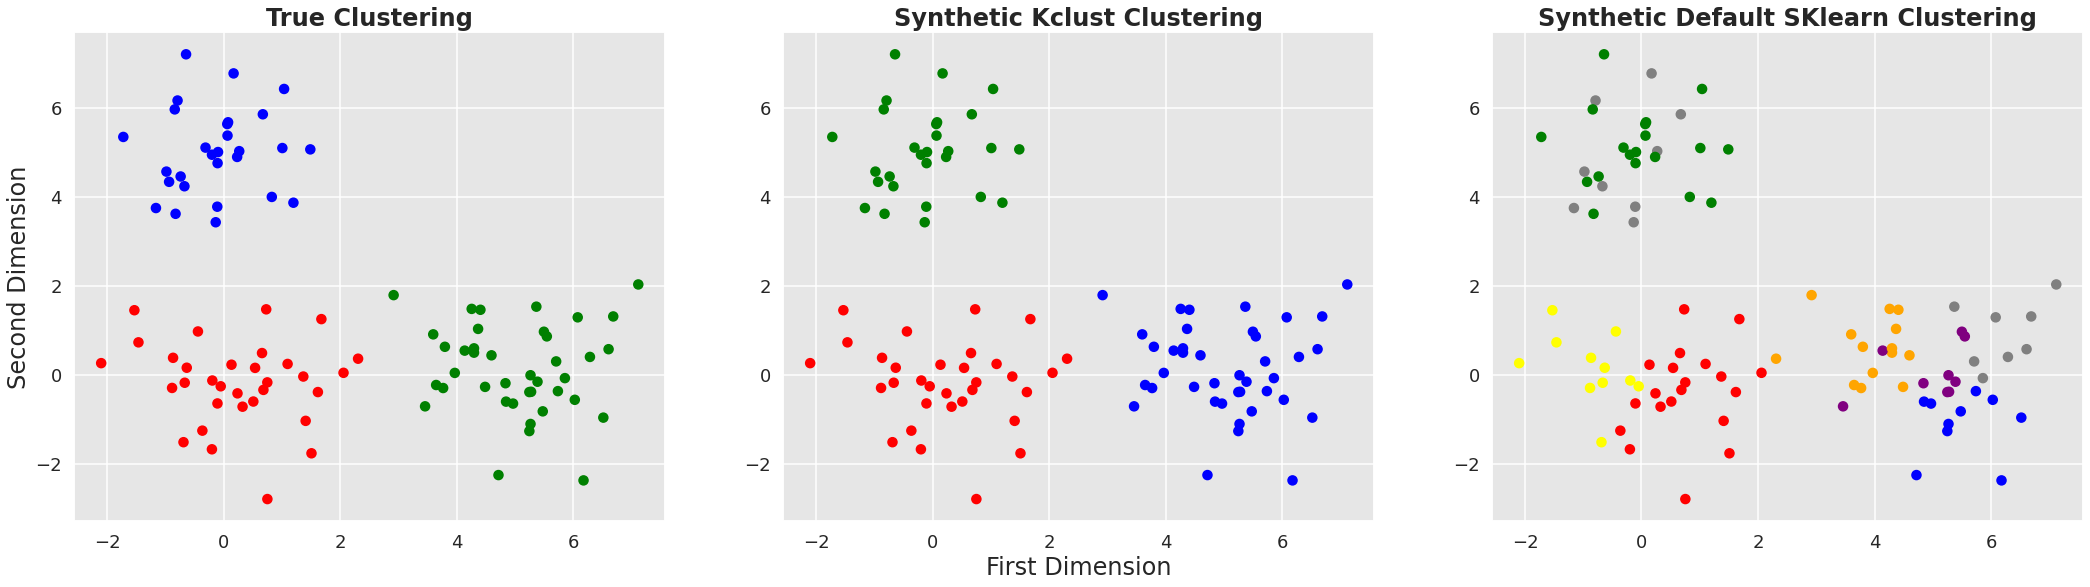

In [34]:
# Plotting Synthetic clusters
import seaborn as sns
sns.set()
sns.set_context("talk", font_scale=1.10)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Labels
c_list = ['red', 'green', 'blue','orange','purple','yellow','gray']

# Figure
fig = plt.figure(figsize=(36,9))

# Synthetic Kmeans Model
plt.subplot(1, 3, (2,2))
plt.title('Synthetic Kclust Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_hat_kmeans_synthetic))
plt.scatter(x_synthetic[:,0],x_synthetic[:,1],c=c_hat_kmeans_synthetic,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xlabel('First Dimension',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Synthetic Default SKlearn Model
plt.subplot(1, 3, (3,3))
plt.title('Synthetic Default SKlearn Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_hat_default_synthetic))
plt.scatter(x_synthetic[:,0],x_synthetic[:,1],c=c_hat_default_synthetic,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Synthetic True Clustering
plt.subplot(1, 3, (1,1))
plt.title('True Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_true_synthetic))
plt.scatter(x_synthetic[:,0],x_synthetic[:,1],c=c_true_synthetic,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.ylabel('Second Dimension',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

We can see the perfect fit achieve by the optimized kclust in the middle plot.

Now let's do the same with the Drosophila data models

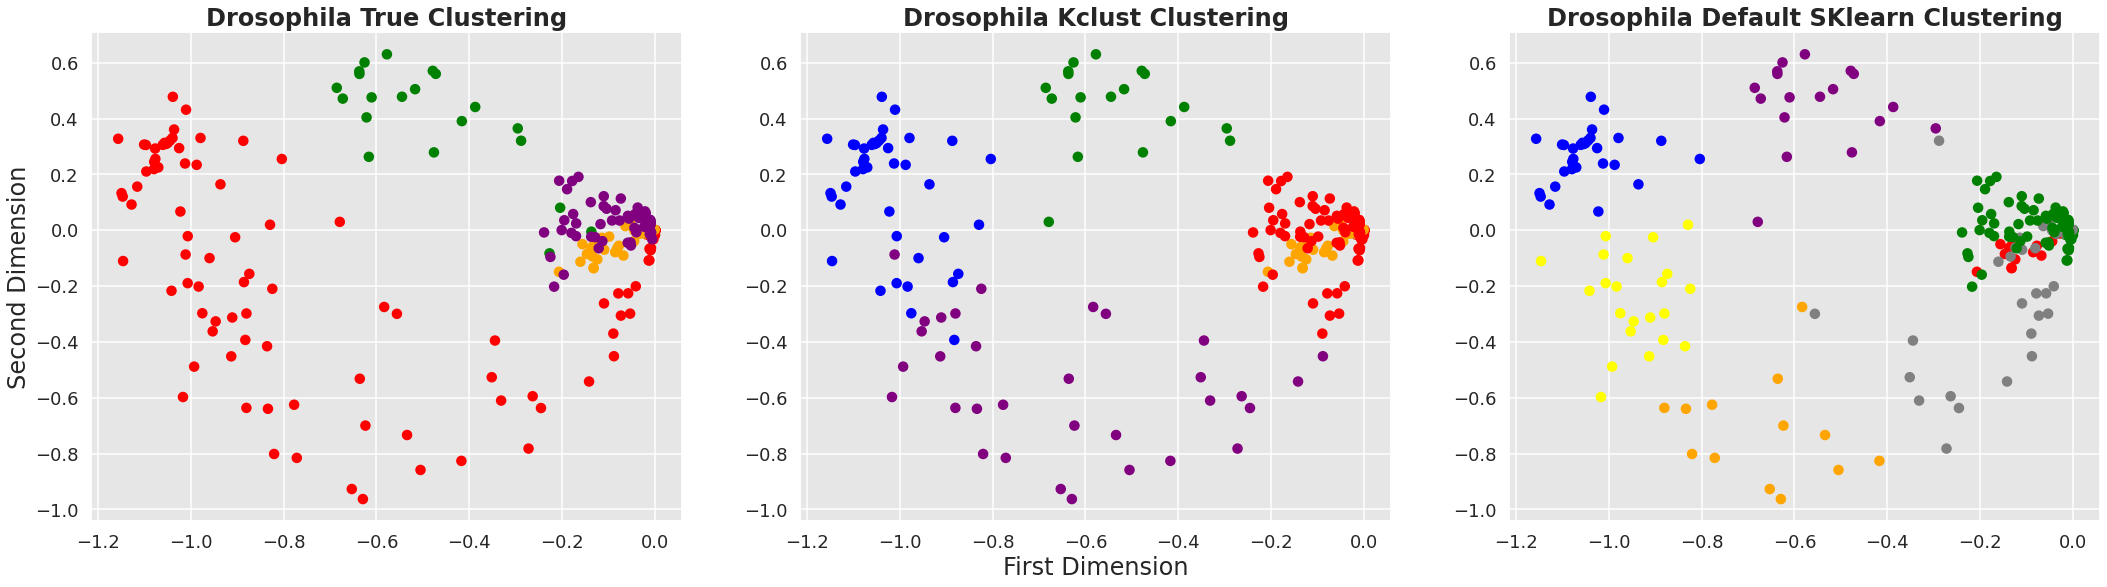

In [32]:
# Plotting Drosophila clusters
import seaborn as sns
sns.set()
sns.set_context("talk", font_scale=1.10)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Labels
c_list = ['red', 'green', 'blue','orange','purple','yellow','gray']

# Figure
fig = plt.figure(figsize=(36,9))

# Drosophila Kmeans Model
plt.subplot(1, 3, (2,2))
plt.title('Drosophila Kclust Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_hat_kmeans_drosophila))
plt.scatter(x_drosophila[:,0],x_drosophila[:,1],c=c_hat_kmeans_drosophila,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xlabel('First Dimension',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Drosophila Default SKlearn Model
plt.subplot(1, 3, (3,3))
plt.title('Drosophila Default SKlearn Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_hat_default_drosophila))
plt.scatter(x_drosophila[:,0],x_drosophila[:,1],c=c_hat_default_drosophila,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Drosophila True Clustering
plt.subplot(1, 3, (1,1))
plt.title('Drosophila True Clustering',fontsize=24,fontweight='bold')
max_c = int(np.max(c_true_drosophila))
plt.scatter(x_drosophila[:,0],x_drosophila[:,1],c=c_true_drosophila,cmap=mp.colors.ListedColormap(c_list[0:max_c+1]))
plt.ylabel('Second Dimension',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

The best fit is once again the optimal kclust in the middle.